The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[1, 2, 3, 11, 12, 14, 20, 27, 28, 32, 34, 36, 38, 40, 41, 42, 52, 55, 56, 58, 60, 63, 64, 68, 69, 70, 72, 75, 76, 78, 80, 84, 85, 88]


C:\Users\Erik\Anaconda3\envs\fui\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Last month:                   idx         1         2         3        11        12  \
date                                                                     
2020-03-31  0.000181  0.021311  0.003418  0.015896  0.075683  0.041714   

                 14        20        27        28  ...        69       70  \
date                                               ...                      
2020-03-31  0.25897  0.064945  0.039535  0.003646  ...  0.003256  0.00624   

                 72        75        76        78        80        84  \
date                                                                    
2020-03-31  0.01505  0.006256  0.025061  0.016603  0.034036  0.023582   

                  85        88  
date                            
2020-03-31  0.025217  0.051111  

[1 rows x 35 columns]


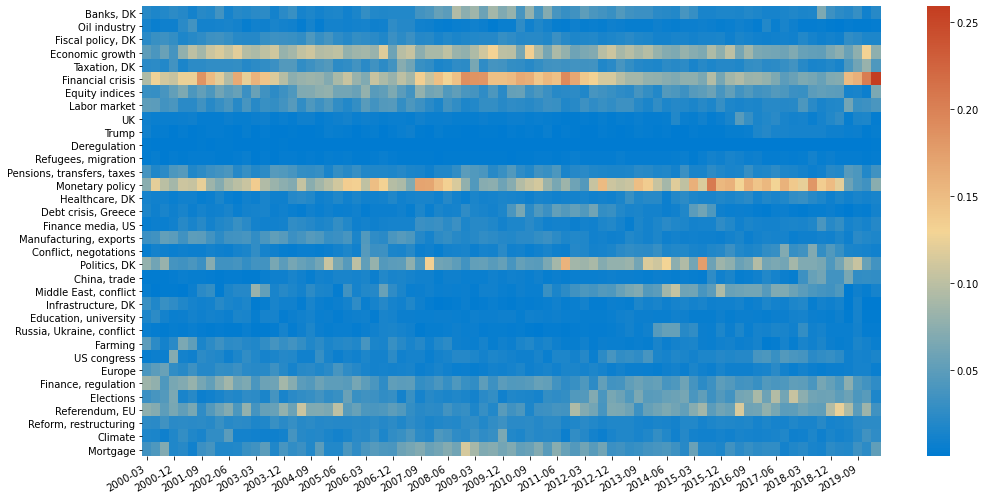

In [11]:
%load_ext autoreload
%autoreload 2
import os
import sys
#hacky spyder crap
#sys.path.insert(1, 'C:\\Users\\EGR\\AppData\\Roaming\\Python\\Python37\\site-packages')
sys.path.insert(1, 'C:\\projects\\FUI')
import codecs
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from src.fui.indices import LDAIndexer
from src.fui.utils import params

international = LDAIndexer(name='ep')
df = international.build(num_topics=90,topics=['EP'],topic_thold=0.5,frq='Q',norm=True)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter("%Y")

label_path = os.path.join(params().paths['topic_labels'],
                          'labels' + str(90) + '.json')
with codecs.open(label_path, 'r', encoding='utf-8-sig') as f:
    labels = json.load(f)

dft=df.drop(columns = ['idx'], axis=1).transpose()
dft.columns = dft.columns.strftime('%Y-%m')

nbcm = LinearSegmentedColormap.from_list(
        'nbcm', [(0/255,123/255,209/255),  (244/255,212/255,149/255), (196/255,61/255,33/255)], N=200)

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax = sns.heatmap(dft, cmap=nbcm, linewidths=0, annot=False, xticklabels =3)
ax.set_yticklabels([labels[str(i)] for i in dft.index], rotation=0)

plt.tight_layout()
fig.autofmt_xdate()
plt.savefig('C:/projects/FUI/figures/topics_over_time_heatmap.pdf', dpi=300)


In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
#hacky spyder crap
#sys.path.insert(1, 'C:\\Users\\EGR\\AppData\\Roaming\\Python\\Python37\\site-packages')
sys.path.insert(1, 'C:\\projects\\FUI')
import codecs
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from src.fui.indices import LDAIndexer
from src.fui.utils import params

international = LDAIndexer(name='ep')
df = international.build(num_topics=90,topics=['EP'],topic_thold=0.5,frq='Q',norm=True)

[1, 2, 3, 11, 12, 14, 20, 27, 28, 32, 34, 36, 38, 40, 41, 42, 52, 55, 56, 58, 60, 63, 64, 68, 69, 70, 72, 75, 76, 78, 80, 84, 85, 88]


C:\Users\Erik\Anaconda3\envs\fui\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Last month:                   idx         1         2         3       11        12  \
date                                                                    
2020-06-30  2.374209 -0.149537 -0.621471 -0.474923  0.76491 -0.149965   

                  14        20        27        28  ...        69        70  \
date                                                ...                       
2020-06-30  2.335421  1.982153  1.582702 -0.370652  ... -0.738101 -1.118098   

                  72        75        76        78        80        84  \
date                                                                     
2020-06-30 -0.437909 -0.913845 -0.335913 -0.962036 -0.850108 -0.154335   

                  85        88  
date                            
2020-06-30 -0.472352  1.808357  

[1 rows x 35 columns]


In [2]:
df

,idx,1,2,3,11,12,14,20,27,28,...,69,70,72,75,76,78,80,84,85,88
date,,,,,,,,,,,,,,,,,,,,,
2000-03-31,-1.603759,-0.417440,0.568564,0.355684,-1.588257,-0.365670,-0.514691,-0.783822,1.962149,0.096215,...,-0.257538,2.853025,-1.294098,2.495342,2.346884,-0.235495,0.965151,0.265808,-0.280516,-0.261310
2000-06-30,-1.051054,-0.685130,-0.371767,1.352430,-2.086454,-0.294551,0.297863,-0.838609,1.857500,-0.358555,...,-0.579317,0.746290,-0.986798,3.363504,1.925839,0.051945,0.678102,0.107512,-0.413174,0.126860
2000-09-30,-0.311322,-0.521548,-0.107714,1.581025,-1.360359,-0.518773,-0.065946,-0.260006,0.746176,-0.385396,...,-0.656978,-0.402233,-0.945362,4.142400,-0.356467,0.398153,-0.193099,1.298019,-0.983291,1.457964
2000-12-31,-0.856441,-0.296173,-0.142006,0.819765,-2.167621,0.184801,-0.214551,0.584724,1.143176,-0.324780,...,-0.421995,0.609731,4.865314,1.219560,1.052355,1.374474,0.413345,0.212682,-0.202675,-1.095468
2001-03-31,-1.105472,-0.475767,2.213406,-0.520421,-0.327189,-0.711304,0.211633,1.363295,-0.583844,-0.046421,...,-0.508784,4.267161,-0.603185,0.754920,1.429658,-1.098748,-0.122602,0.194395,1.034419,-0.921415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30,-0.497768,-0.436416,-0.915644,0.813861,-1.348753,0.359223,0.860393,-1.806145,3.162005,-0.575124,...,-0.295698,-0.812163,-0.845239,-0.694849,1.762863,0.970619,1.805130,-0.516580,-0.531090,-1.008194
2019-09-30,-0.279152,-0.495365,-1.043124,0.378309,-0.358378,1.201283,1.112319,-1.788886,0.173484,1.040286,...,0.211391,-0.050521,-0.475634,-0.205983,-0.262839,0.203923,-0.182286,0.116629,0.277989,-0.363683
2019-12-31,0.661110,-0.972281,-0.947177,-0.534774,2.107276,2.234567,2.006329,-2.059505,0.583619,1.075272,...,-0.554350,-0.384144,-0.606748,-0.354455,-0.658515,0.407923,1.204144,0.289676,1.377665,-0.800918
